In [1]:
import sys
import pandas as pd
import utils
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection 
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
import statsmodels.formula.api as sm
from sklearn.metrics import roc_auc_score
from collections import Counter
from timeit import default_timer as timer
import pickle

In [2]:
args = sys.argv
args = ['./run_MINERVA_test_train_grid.sh','/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc', 'CRC_k7', 'maxfeat10_ComBat', 'BatchCorrected', 'bin_crc_normal', 1, 0,
        10, 'maxfeat10_MINERVA']


In [3]:

print(args)


greater_folder = args[1] # what folder do you save your different datasets in
study_names = args[2].split("&")  # what is the name of the dataset (tells the program which folder to check)
data_type = args[3] # type of data. kmer vs OTU

prefix_name = args[4] # what is the prefix of the file name
column_of_interest = args[5] # what is the phenotype you are predicting (use the same name in the column of the metadata you want to predict), this programs reads from metadata.txt

norm_input = bool(int(args[6]))
map_with_accession = bool(int(args[7]))
num_pcs = 20
num_pcs = int(args[8])
special_name = args[9]
if data_type == "otu" or data_type == "kmer":
    data_folders = [greater_folder + "/data/" + study_name + "/" for study_name in study_names] 
    metadata_folder =   greater_folder + "/data/" + study_names[0] + "/"  
else:
    data_folders = [greater_folder + "/data/" + study_name + "/" + "protect_" + column_of_interest + "/" + prefix_name + "_"  for study_name in study_names] 
    metadata_folder = greater_folder + "/data/" + study_names[0] + "/" 


['./run_MINERVA_test_train_grid.sh', '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc', 'CRC_k7', 'maxfeat10_ComBat', 'BatchCorrected', 'bin_crc_normal', 1, 0, 10, 'maxfeat10_MINERVA']


In [4]:

all_datasets_dict = pickle.load(open( metadata_folder +"_" + special_name + "_MINERVA_tt_grid.pkl", "rb" ))
            

In [9]:
all_datasets_dict.keys()

dict_keys(['dataset0'])

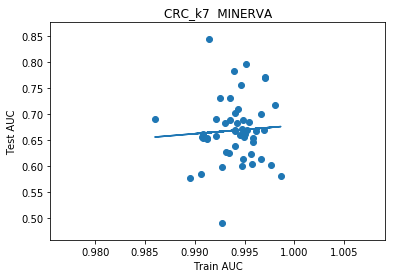

In [10]:
import matplotlib.pyplot as plt

# check MINERVA PCs
notPC = False
train_auc = []
test_auc = []
for i in range(10):
      
    if notPC:
        train_auc.extend(all_datasets_dict['dataset0']['train_auc_trained'])
        test_auc.extend(all_datasets_dict['dataset0']['test_auc_trained'])
    else:   
        train_auc.extend(all_datasets_dict['dataset0']["PC" + str(i)]['train_auc_trained'])
        test_auc.extend(all_datasets_dict['dataset0']["PC" + str(i)]['test_auc_trained'])
    
x = np.array(train_auc)
y = np.array(test_auc)
plt.scatter( x,  y)

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

plt.xlabel("Train AUC")
plt.ylabel("Test AUC")
plt.title("CRC_k7  MINERVA")
plt.show()

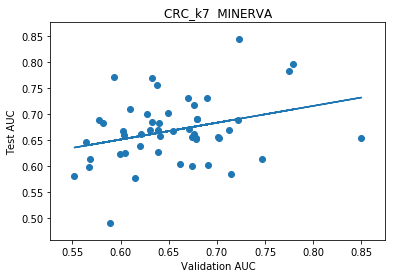

In [12]:
# check MINERVA PCs

notPC = False
train_auc = []
test_auc = []
for i in range(10):
    if notPC:
        train_auc.extend(all_datasets_dict['dataset0']['val_auc_trained'])
        test_auc.extend(all_datasets_dict['dataset0']['test_auc_trained'])
    else:   
        train_auc.extend(all_datasets_dict['dataset0']["PC" + str(i)]['val_auc_trained'])
        test_auc.extend(all_datasets_dict['dataset0']["PC" + str(i)]['test_auc_trained'])
    
x = np.array(train_auc)
y = np.array(test_auc)
plt.scatter( x,  y)

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

plt.xlabel("Validation AUC")
plt.ylabel("Test AUC")
plt.title("CRC_k7  MINERVA")
plt.show()

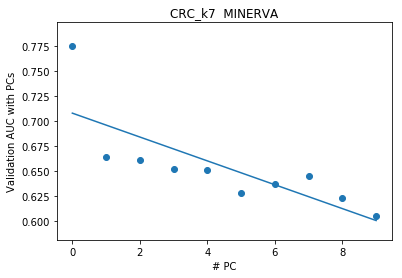

In [17]:
#check overall correlation or trend

auc = []
x = []
plot_train = False
plot_validation = True

if plot_train:
    ylab_input = "Train AUC with PCs"
else:
    if plot_validation:
        ylab_input = "Validation AUC with PCs"
    else:
        ylab_input = "Test AUC with PCs"
for i in range(10):
    x.append(i)
    if plot_train:
        auc.append(np.mean(all_datasets_dict['dataset0']["PC" + str(i)]['train_auc_trained']))
    else:
        if plot_validation:
            auc.append(np.mean(all_datasets_dict['dataset0']["PC" + str(i)]['val_auc_trained']))
        else:
            auc.append(np.mean(all_datasets_dict['dataset0']["PC" + str(i)]['test_auc_trained']))
    
x = np.array(x)
y = np.array(auc)
plt.scatter( x,  y)

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

plt.xlabel("# PC")
plt.ylabel(ylab_input)
plt.title("CRC_k7  MINERVA")
plt.show()


# plt.plot(x1, y1, "g")



# plt.plot(x2, y2, "r")